# Formula 1

## Table of Contents
1. [Import Libraries](#import-libraries)
2. [Load Data from Ergast API](#load-data)
    - [Seasons](#seasons)

### 1. Import Libraries <a class="anchor" id="import-libraries"></a>

In [1]:
from datetime import datetime
import requests
import json
import pandas as pd

import matplotlib.pyplot as plt

### 2. Load Data from Ergast API <a class="anchor" id="load-data"></a>

#### Seasons <a class="anchor" id="seasons"></a>
http://ergast.com/mrd/methods/seasons/

http://ergast.com/mrd/methods/circuits/

In [14]:
current_year = datetime.today().year
seasons = list(range(1950, current_year+1))

season_list = []
total_races_list = []
total_circuits_list = []

# loop over all seasons
for year in seasons:
    season_response_API = requests.get('http://ergast.com/api/f1/{}.json'.format(year))
    season_data = season_response_API.text
    season_parse_json = json.loads(season_data)
    
    circuit_response_API = requests.get('http://ergast.com/api/f1/{}/circuits.json'.format(year))
    circuit_data = circuit_response_API.text
    circuit_parse_json = json.loads(circuit_data)
    
    season = season_parse_json['MRData']['RaceTable']['season']
    season_list.append(season)
    
    total_races = season_parse_json['MRData']['total']
    total_races_list.append(total_races)
    
    total_circuits = circuit_parse_json['MRData']['total']
    total_circuits_list.append(total_circuits)
    
    #print('Processed season {}.'.format(season))
    
    #print('Season {} contains {} races on {} circuits in total.'.format(season, total_races, total_circuits))

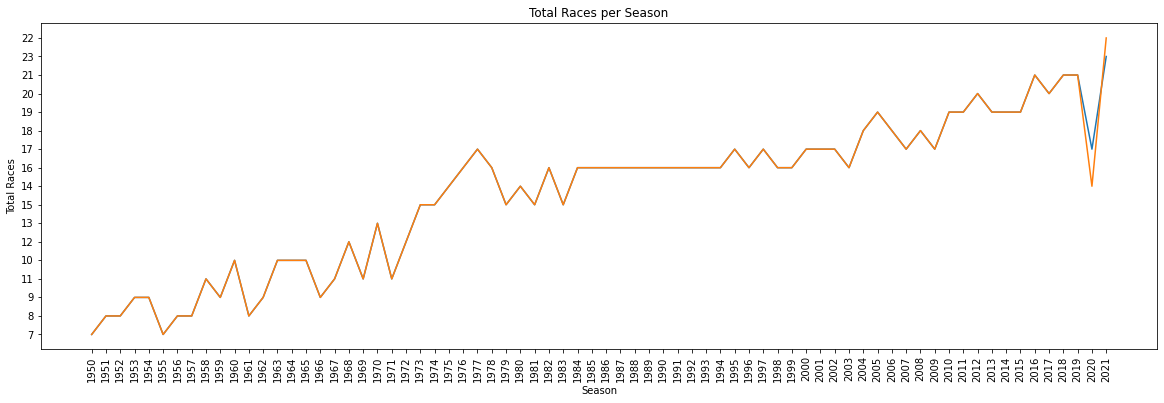

In [16]:
plt.figure(figsize=(20, 6))
plt.title('Total Races per Season')
plt.xlabel('Season')
plt.ylabel('Total Races')
plt.xticks(rotation=90)
plt.plot(season_list, total_races_list)
plt.plot(season_list, total_circuits_list)
plt.show()

In [59]:
response_API = requests.get('http://ergast.com/api/f1/seasons.json')
data = response_API.text
parse_json = json.loads(data)

df_seasons = pd.json_normalize(parse_json['MRData']['SeasonTable']['Seasons'])
#print(df_seasons.head(5))

In [60]:
response_API = requests.get('http://ergast.com/api/f1/circuits.json')
data = response_API.text
parse_json = json.loads(data)

df_circuits = pd.json_normalize(parse_json['MRData']['CircuitTable']['Circuits'])
#print(df_circuits.head(5))

In [61]:
response_API = requests.get('http://ergast.com/api/f1/races.json')
data = response_API.text
parse_json = json.loads(data)

df_races = pd.json_normalize(parse_json['MRData']['RaceTable']['Races'])
#print(df_races.head(5))

In [90]:
response_API = requests.get('http://ergast.com/api/f1/results.json',)
data = response_API.text
parse_json = json.loads(data)

df_race_results = pd.json_normalize(parse_json['MRData']['RaceTable']['Races'])
#print(df_race_results.head(5))

In [88]:
response_API = requests.get('http://ergast.com/api/f1/qualifying.json')
data = response_API.text
parse_json = json.loads(data)

df_qualifying_results = pd.json_normalize(parse_json['MRData']['RaceTable']['Races'])
#print(df_qualifying_results.head(5))

In [78]:
response_API = requests.get('http://ergast.com/api/f1/status.json')
data = response_API.text
parse_json = json.loads(data)

df_status = pd.json_normalize(parse_json['MRData']['StatusTable']['Status'])
#print(df_status.head(5))

In [63]:
df_seasons.iloc[0:6]

,season,url
0,1950,https://en.wikipedia.org/wiki/1950_Formula_One...
1,1951,https://en.wikipedia.org/wiki/1951_Formula_One...
2,1952,https://en.wikipedia.org/wiki/1952_Formula_One...
3,1953,https://en.wikipedia.org/wiki/1953_Formula_One...
4,1954,https://en.wikipedia.org/wiki/1954_Formula_One...
5,1955,https://en.wikipedia.org/wiki/1955_Formula_One...


In [64]:
df_circuits.iloc[0:6]

,circuitId,url,circuitName,Location.lat,Location.long,Location.locality,Location.country
0,adelaide,http://en.wikipedia.org/wiki/Adelaide_Street_C...,Adelaide Street Circuit,-34.9272,138.617,Adelaide,Australia
1,ain-diab,http://en.wikipedia.org/wiki/Ain-Diab_Circuit,Ain Diab,33.5786,-7.6875,Casablanca,Morocco
2,aintree,http://en.wikipedia.org/wiki/Aintree_Motor_Rac...,Aintree,53.4769,-2.94056,Liverpool,UK
3,albert_park,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,Australia
4,americas,http://en.wikipedia.org/wiki/Circuit_of_the_Am...,Circuit of the Americas,30.1328,-97.6411,Austin,USA
5,anderstorp,http://en.wikipedia.org/wiki/Scandinavian_Raceway,Scandinavian Raceway,57.2653,13.6042,Anderstorp,Sweden


In [94]:
df_races.iloc[0:6]

,season,round,url,raceName,date,Circuit.circuitId,Circuit.url,Circuit.circuitName,Circuit.Location.lat,Circuit.Location.long,Circuit.Location.locality,Circuit.Location.country
0,1950,1,http://en.wikipedia.org/wiki/1950_British_Gran...,British Grand Prix,1950-05-13,silverstone,http://en.wikipedia.org/wiki/Silverstone_Circuit,Silverstone Circuit,52.0786,-1.01694,Silverstone,UK
1,1950,2,http://en.wikipedia.org/wiki/1950_Monaco_Grand...,Monaco Grand Prix,1950-05-21,monaco,http://en.wikipedia.org/wiki/Circuit_de_Monaco,Circuit de Monaco,43.7347,7.42056,Monte-Carlo,Monaco
2,1950,3,http://en.wikipedia.org/wiki/1950_Indianapolis...,Indianapolis 500,1950-05-30,indianapolis,http://en.wikipedia.org/wiki/Indianapolis_Moto...,Indianapolis Motor Speedway,39.795,-86.2347,Indianapolis,USA
3,1950,4,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...,Swiss Grand Prix,1950-06-04,bremgarten,http://en.wikipedia.org/wiki/Circuit_Bremgarten,Circuit Bremgarten,46.9589,7.40194,Bern,Switzerland
4,1950,5,http://en.wikipedia.org/wiki/1950_Belgian_Gran...,Belgian Grand Prix,1950-06-18,spa,http://en.wikipedia.org/wiki/Circuit_de_Spa-Fr...,Circuit de Spa-Francorchamps,50.4372,5.97139,Spa,Belgium
5,1950,6,http://en.wikipedia.org/wiki/1950_French_Grand...,French Grand Prix,1950-07-02,reims,http://en.wikipedia.org/wiki/Reims-Gueux,Reims-Gueux,49.2542,3.93083,Reims,France


In [92]:
df_race_results.iloc[0:6]

,season,round,url,raceName,date,Results,Circuit.circuitId,Circuit.url,Circuit.circuitName,Circuit.Location.lat,Circuit.Location.long,Circuit.Location.locality,Circuit.Location.country
0,1950,1,http://en.wikipedia.org/wiki/1950_British_Gran...,British Grand Prix,1950-05-13,"[{'number': '2', 'position': '1', 'positionTex...",silverstone,http://en.wikipedia.org/wiki/Silverstone_Circuit,Silverstone Circuit,52.0786,-1.01694,Silverstone,UK
1,1950,2,http://en.wikipedia.org/wiki/1950_Monaco_Grand...,Monaco Grand Prix,1950-05-21,"[{'number': '34', 'position': '1', 'positionTe...",monaco,http://en.wikipedia.org/wiki/Circuit_de_Monaco,Circuit de Monaco,43.7347,7.42056,Monte-Carlo,Monaco


In [72]:
df_qualifying_results.iloc[0:6]

,season,round,url,raceName,date,time,QualifyingResults,Circuit.circuitId,Circuit.url,Circuit.circuitName,Circuit.Location.lat,Circuit.Location.long,Circuit.Location.locality,Circuit.Location.country
0,2021,1,https://en.wikipedia.org/wiki/2021_Bahrain_Gra...,Bahrain Grand Prix,2021-03-28,15:00:00Z,"[{'number': '33', 'position': '1', 'Driver': {...",bahrain,http://en.wikipedia.org/wiki/Bahrain_Internati...,Bahrain International Circuit,26.0325,50.5106,Sakhir,Bahrain
1,2021,2,http://en.wikipedia.org/wiki/2021_Emilia_Romag...,Emilia Romagna Grand Prix,2021-04-18,13:00:00Z,"[{'number': '44', 'position': '1', 'Driver': {...",imola,http://en.wikipedia.org/wiki/Autodromo_Enzo_e_...,Autodromo Enzo e Dino Ferrari,44.3439,11.7167,Imola,Italy


In [79]:
df_status.iloc[0:6]

,statusId,count,status
0,1,6696,Finished
1,2,143,Disqualified
2,3,1033,Accident
3,4,816,Collision
4,5,2003,Engine
5,6,798,Gearbox
